In [7]:
import matplotlib.pyplot as plt
import numpy as np

def generate_cdf(values, num_of_points, metric):
    sorted_data = np.sort(np.array(values).flatten())
    if num_of_points > len(sorted_data):
        num_of_points = len(sorted_data)
    downsample_factor = int(len(sorted_data)/num_of_points)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    # Retain more points in the tails
    #tail_indices = np.concatenate((np.where(cdf <= 0.05)[0], np.where(cdf >= 0.95)[0]))
    if metric == 'lqr':
        tail_indices = np.where(cdf >= 0.99)[0]
        # Subsample the dense region
        dense_indices = np.where(cdf < 0.99)[0]
    if metric == 'sinr': 
        tail_indices = np.where(cdf >= 1)[0]
        dense_indices = np.where(cdf < 1)[0]
    if metric == 'bler':
        tail_indices = np.where(sorted_data >= 0.500001)[0]
        # Subsample the dense region
        dense_indices = np.where(sorted_data < 0.500001)[0]

    # if metric == 'bler':
    #     tail_indices = np.concatenate((np.where(cdf <= 0.05)[0], np.where(cdf >= 0.95)[0]))
    #     dense_indices = np.where((cdf > 0.05) & (cdf < 0.95))[0]

    sparse_dense_indices = dense_indices[::downsample_factor]

    # Combine tail and sparse dense indices
    selected_indices = np.unique(np.concatenate((tail_indices, sparse_dense_indices)))

    downsampled_data = sorted_data[selected_indices]
    downsampled_cdf = cdf[selected_indices]
    return downsampled_data, downsampled_cdf

Simulation settings

In [2]:
factory_length = 30
num_steps = 1000
num_of_subnetworks = 50
num_of_episodes = 100
num_subbands = 3

Run ideal scenario

In [3]:
import run_Ideal_scenario
save_file_name = 'IdealTransmission_mixedplant.npz'
ideal_mean_lqr = run_Ideal_scenario.collect_mean_lqr(num_of_episodes, num_of_subnetworks, num_subbands, num_steps, factory_length, save_file_name)
x,y = generate_cdf(ideal_mean_lqr.flatten(), 500, metric='lqr')
method = 'Ideal'
plt.loglog(x, 1-y, label=method)
print('step plot')
plt.title('Mean LQR')
plt.ylabel('CCDF')
plt.xlabel('Mean LQR')
#plt.legend()
plt.grid()
#ax1.set_xlim([10**0,10**5])
plt.ylim([10**-4,10**0])
plt.xlim([10**0,1e3])

Env: code/src/env/infactory_env.py
     Factory with n=50 subnetworks and m=1 devices in sparse clutter.
     Channel allocation for k=3 channels and u=4 power levels.
     Action space for channels=[0 1 2] and power=[-10].
Calculating new shadowing map.


c:\Users\VQ72TN\OneDrive - Aalborg Universitet\Documents\Python Scripts\CADIC\static_infactory_env_wCartPole.py:934: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3618.)
  tx_powers = tx_powers.reshape([-1,1,self.numCell,1]).repeat(1,self.num_fadingblocks_per_subband, self.numSubbands,1,1).T.unsqueeze(2)


Episode  0  mean lqr of plants  [ 3.64669379  4.31117102 11.98665202  6.39855311  4.93451331 14.90433095  7.15666761  8.04002395  5.2434826  12.44780995  2.60177145 13.1855132  10.46939009  4.16606979  2.41329897  3.29659452  2.50767863  4.24924006
  3.98995807  9.18266778  9.95790459 11.89209397 11.82251069  5.29749628  3.95574423 10.31248125  4.9552213   4.50274077 11.33278125  8.17272665  5.25388287  4.77503717  5.49613004  2.42170851  4.1001303   5.1480718
  3.86092433  7.45553777  7.99314947  8.05487142  4.86548652 10.81958087 11.74430427  6.66587668 13.03224088 10.1463622  13.26176207  5.17687414  9.44718865  4.07250728]
Episode  1  mean lqr of plants  [ 5.88860146  2.98412329 11.02515485 12.68885927  4.8171648  10.04435927  5.11973902  5.60861571  8.94142528  5.46766126 12.14904352  6.79433476  5.06109242  7.22927051 11.50184817  2.75293405  3.92499655  7.23787969
  8.35125696  4.84928515  6.08267895  7.70730813  6.682895    5.66869332  5.33058962  7.45709483  9.05100106  9.0321

TypeError: cannot unpack non-iterable NoneType object

step plot


(1, 1000.0)

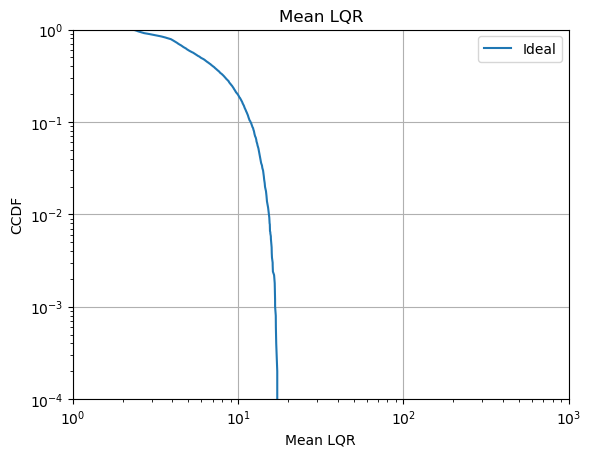

In [9]:
x,y = generate_cdf(ideal_mean_lqr.flatten(), 500, metric='lqr')
method = 'Ideal'
plt.loglog(x, 1-y, label=method)
print('step plot')
plt.title('Mean LQR')
plt.ylabel('CCDF')
plt.xlabel('Mean LQR')
plt.legend()
plt.grid()
#ax1.set_xlim([10**0,10**5])
plt.ylim([10**-4,10**0])
plt.xlim([10**0,1e3])